In [2]:
# Install and import module for a visualization of the computational graph
!pip install torchviz
from torchviz import make_dot

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4130 sha256=21d129ebefed94ce73e08a507225342678d5a5d370220d43df80b38c9b6b6196
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [3]:
# Import the torch module
import torch

# PyTorch’s autograd

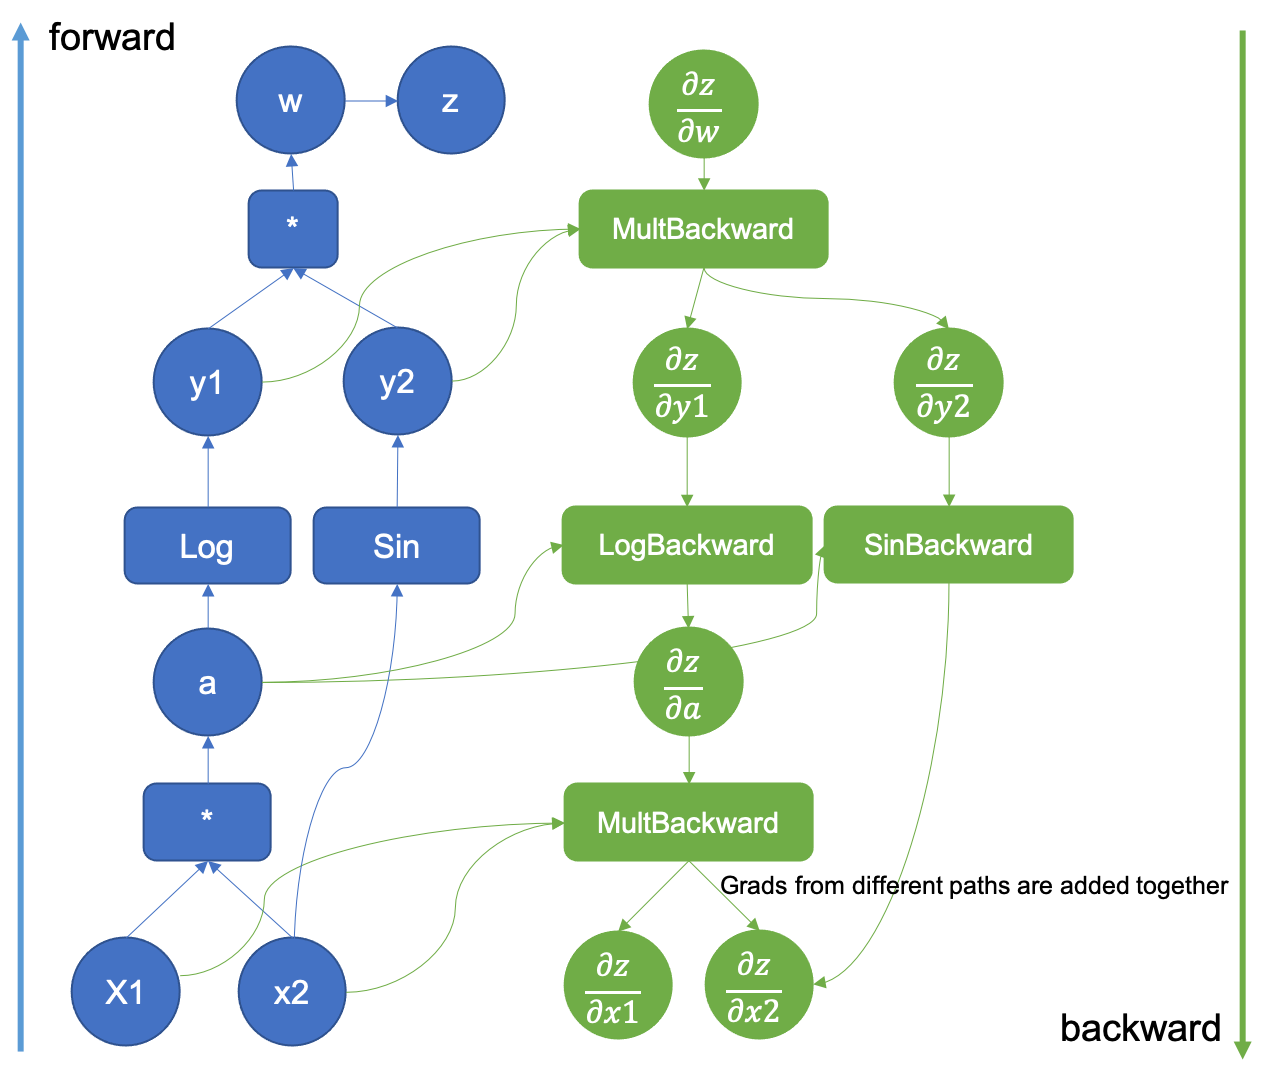

PyTorch computes the gradient of a function with respect to the inputs by using automatic differentiation.
> - most PyTorch tensor operations are **differentiable**
>> - so that we can compute the gradient of the loss with respect to the parameters.
> - PyTorch **computes the gradient automatically**
>> - PyTorch **tensors** can remember where they come from, in terms of the operations and parent tensors that originated them, and they can automatically provide the chain of derivatives of such operations with respect to their inputs.

**Readings**:
> - https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
> - https://pytorch.org/docs/stable/notes/autograd.html
> - http://blog.ezyang.com/2019/05/pytorch-internals/
> - https://pytorch.org/blog/overview-of-pytorch-autograd-engine/
> - https://pytorch.org/blog/computational-graphs-constructed-in-pytorch/
> - https://www.cs.toronto.edu/~rgrosse/courses/csc321_2018/slides/lec10.pdf

## Tensor Attributes: .requires_grad and .grad

> - **.requires_grad**: Is True if gradients need to be computed for this Tensor, False otherwise.
> - **.grad**: This attribute is None by default and becomes a Tensor the first time a call to backward() computes gradients for self. The attribute will then contain the gradients computed and future calls to backward() will **accumulate** (add) gradients into it.
> - **.grad_fn**: Each variable has a .grad_fn attribute that references a function that has created a function (except for Tensors created by the user - these have None as .grad_fn).

In [4]:
x = torch.randn(4,3)
print('x.requires_grad -->', x.requires_grad)
print()

# set the requires_grad=True argument to True in the tensor constructor
y = torch.randn(4,3,requires_grad = True)
print('y.requires_grad -->', y.requires_grad)
print()

# or, use .requires_grad_(True) method
z = torch.randn(4,3)
print('z.requires_grad -->', z.requires_grad)
z.requires_grad_(True)
print('z.requires_grad -->', z.requires_grad)

x.requires_grad --> False

y.requires_grad --> True

z.requires_grad --> False
z.requires_grad --> True


x --> tensor([[ 0.9778,  1.5294,  0.1276],
        [ 0.8739, -0.4531, -0.1206],
        [-1.2007,  0.6059,  0.1401],
        [ 1.1308, -0.3465,  0.6266]], requires_grad=True)
x.grad_fn --> None

y --> tensor([[0.9560, 2.3390, 0.0163],
        [0.7637, 0.2053, 0.0145],
        [1.4418, 0.3671, 0.0196],
        [1.2788, 0.1201, 0.3926]], grad_fn=<PowBackward0>)
y.grad_fn --> <PowBackward0 object at 0x7fcead8f8280>



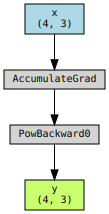

In [5]:
x = torch.randn(4,3,requires_grad = True)
print('x -->', x)
print('x.grad_fn -->', x.grad_fn)
print()

y = x**2   # check change of computational graph if using sum
print('y -->', y)
print('y.grad_fn -->', y.grad_fn)
print()

make_dot(y, params ={'x':x, 'y':y},)

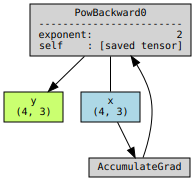

In [6]:
make_dot(y, params ={'x':x, 'y':y}, show_attrs=True, show_saved=True)

## Computing gradients

When we call **.backward()** as shown below,
> - PyTorch **computes** the derivatives of the loss throughout the chain of functions (the computation graph), and **accumulates** their values in the grad attribute of those tensors (the leaf nodes of the graph).

**WARNING:** Calling backward will lead derivatives to accumulate at leaf nodes. We need to zero the gradient explicitly after using it for parameter updates.

x --> tensor([[ 0.0128, -1.4070, -0.2058,  0.1292,  0.2921],
        [-1.2838, -1.1036, -0.3105,  0.6419, -0.3250]], requires_grad=True)
x.grad --> None

y --> tensor([[1.6432e-04, 1.9797e+00, 4.2370e-02, 1.6694e-02, 8.5324e-02],
        [1.6480e+00, 1.2180e+00, 9.6396e-02, 4.1207e-01, 1.0564e-01]],
       grad_fn=<PowBackward0>)

z --> tensor(5.6044, grad_fn=<SumBackward0>)

x.grad--> tensor([[ 0.0256, -2.8140, -0.4117,  0.2584,  0.5842],
        [-2.5675, -2.2073, -0.6210,  1.2839, -0.6500]])


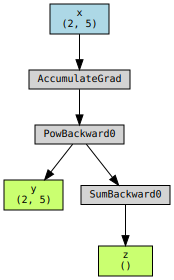

In [7]:
x = torch.randn(2,5,requires_grad = True)
print('x -->', x)
print('x.grad -->', x.grad)
print()

y = x**2
print('y -->', y)
print()

z = y.sum()
print('z -->', z)
print()

z.backward()
print('x.grad-->', x.grad)

make_dot((y, z), params ={'x':x, 'y':y,'z':z})

x --> tensor([[-0.5904,  0.8497, -1.1181, -0.8265,  0.6416],
        [-0.2556, -0.1931, -0.9906, -0.9093,  0.5189]], requires_grad=True)
x.grad--> None

x.grad--> tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

x.grad--> tensor([[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]])

x.grad--> tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


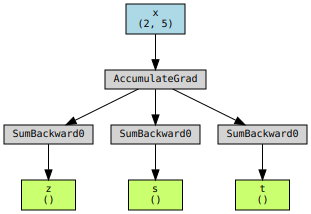

In [8]:
x = torch.randn(2,5,requires_grad = True)
print('x -->', x)
print('x.grad-->', x.grad)
print()

z = x.sum()
z.backward()
print('x.grad-->', x.grad)
print()

s = x.sum()
s.backward()
print('x.grad-->', x.grad)
print()

t = x.sum()
x.grad.data.zero_()  # to zero the gradient explicitly
t.backward()
print('x.grad-->', x.grad)

make_dot((z,s,t), params ={'x':x, 's':s,'z':z,  't':t})

## Caution: intermediary variable results are deleted after .backward()
**Warning:** To reduce memory usage, during the .backward() call, all the intermediary results are deleted when they are not needed anymore. Hence if you try to call .backward() again, the intermediary results don’t exist and the backward pass cannot be performed

https://discuss.pytorch.org/t/runtimeerror-trying-to-backward-through-the-graph-a-second-time-but-the-buffers-have-already-been-freed-specify-retain-graph-true-when-calling-backward-the-first-time/6795/2

x --> tensor([[-1.1955,  1.7726, -0.4050, -0.4844,  1.0294],
        [ 0.0137, -1.2567,  1.4656, -0.7040, -0.1119]], requires_grad=True)
x.grad --> None

y --> tensor([[1.4291e+00, 3.1420e+00, 1.6404e-01, 2.3460e-01, 1.0596e+00],
        [1.8705e-04, 1.5792e+00, 2.1480e+00, 4.9564e-01, 1.2525e-02]],
       grad_fn=<PowBackward0>)

z --> tensor(1.0265, grad_fn=<MeanBackward0>)

x.grad --> tensor([[-0.2391,  0.3545, -0.0810, -0.0969,  0.2059],
        [ 0.0027, -0.2513,  0.2931, -0.1408, -0.0224]])

x.grad --> tensor([[-0.4782,  0.7090, -0.1620, -0.1937,  0.4117],
        [ 0.0055, -0.5027,  0.5862, -0.2816, -0.0448]])



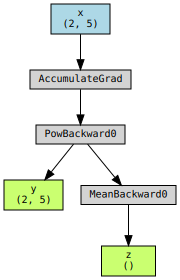

In [9]:
# RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed).
# Saved intermediate values of the graph are freed when you call .backward() or autograd.grad().
# Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

x = torch.randn(2,5,requires_grad = True)
print('x -->', x)
print('x.grad -->', x.grad)
print()

y = x**2
print('y -->', y)
print()

z = y.mean()
print('z -->', z)
print()

z.backward(retain_graph=True)
print('x.grad -->', x.grad)
print()

z.backward()   # if no "retain_graph=True" in the previous .backward(*), an error occurs here
print('x.grad -->', x.grad)
print()

make_dot((y, z), params ={'x':x, 'y':y,'z':z})

x --> tensor([[ 0.5155,  0.6371,  0.1636,  1.2947,  0.0837],
        [-0.8228,  0.0444, -0.1448,  1.2826,  0.4842]], requires_grad=True)
x.grad --> None

y --> tensor([[0.2658, 0.4058, 0.0268, 1.6763, 0.0070],
        [0.6770, 0.0020, 0.0210, 1.6450, 0.2344]], grad_fn=<PowBackward0>)
y.grad --> None

z --> tensor(0.4961, grad_fn=<MeanBackward0>)

x.grad --> tensor([[ 0.1031,  0.1274,  0.0327,  0.2589,  0.0167],
        [-0.1646,  0.0089, -0.0290,  0.2565,  0.0968]])
y.grad --> tensor([[0.1000, 0.1000, 0.1000, 0.1000, 0.1000],
        [0.1000, 0.1000, 0.1000, 0.1000, 0.1000]])



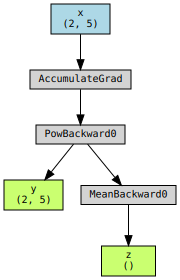

In [10]:
x = torch.randn(2,5,requires_grad = True)
print('x -->', x)
print('x.grad -->', x.grad)
print()

y = x**2
y.retain_grad()  # Enables this Tensor to have their grad populated during backward(). This is a no-op for leaf tensors.
print('y -->', y)
print('y.grad -->', y.grad) # if no "y.retain_grad()"", a warning happens, as "the .grad attribute of a Tensor that is not a leaf Tensor is being accessed"
print()

z = y.mean()
print('z -->', z)
print()

z.backward()
print('x.grad -->', x.grad)
print('y.grad -->', y.grad)  # if no "y.retain_grad()"", y.grad will be None. Also, a warning happens, as "the .grad attribute of a Tensor that is not a leaf Tensor is being accessed"
print()

# as the computational graph is gone after calling .backward(), calling .backward() second time here will result in an error
# z.backward()

make_dot((y, z), params ={'x':x, 'y':y,'z':z})

x --> tensor([[ 0.5036, -1.9591, -0.5270, -1.4090, -0.6752],
        [ 0.0908,  0.7464, -0.7772, -0.6460, -0.5242]], requires_grad=True)
x.grad --> None

y --> tensor([[0.2536, 3.8379, 0.2778, 1.9852, 0.4558],
        [0.0082, 0.5571, 0.6041, 0.4173, 0.2748]], grad_fn=<PowBackward0>)

z --> tensor(0.8672, grad_fn=<MeanBackward0>)

x.grad --> tensor([[ 0.1007, -0.3918, -0.1054, -0.2818, -0.1350],
        [ 0.0182,  0.1493, -0.1554, -0.1292, -0.1048]])

x.grad --> tensor([[1.1007, 0.6082, 0.8946, 0.7182, 0.8650],
        [1.0182, 1.1493, 0.8446, 0.8708, 0.8952]])



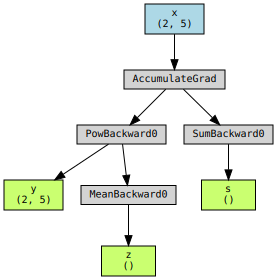

In [11]:
x = torch.randn(2,5,requires_grad = True)
print('x -->', x)
print('x.grad -->', x.grad)
print()

y = x**2
print('y -->', y)
print()

z = y.mean()
print('z -->', z)
print()

z.backward()   # check if retain_graph=True
print('x.grad -->', x.grad)
print()

s = x.sum()  # if "s = y.sum", there will be an error here
s.backward()
print('x.grad -->', x.grad)
print()

make_dot((y, z, s), params ={'x':x, 'y':y,'z':z,'s':s})

## $x+=100$ v.s $x=x+100$

>- $x+=100$: if x's requires_grad is True, this will incur a RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.
>- $x=x+100$: suppose that x was originally a leaf variable, after this operation, x is assigned to a new tenor, no longer a leaf Variable

x --> tensor([[-1.7504, -1.4327,  0.7919, -0.2458, -0.0855],
        [ 2.2023, -0.6291, -0.5683,  0.5609,  2.1681]], requires_grad=True)
x.requires_grad --> True



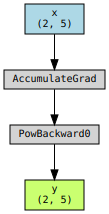

In [21]:
x = torch.randn(2, 5,requires_grad = True)
print('x -->', x)
print('x.requires_grad -->', x.requires_grad)
print()

#x += 100    # <-- error if in-place update is used on a tensor that has requires_grad=true
y = x**2

make_dot((x,y), params ={'x':x, 'y':y})

In [22]:
x = torch.randn(2, 5,requires_grad = True)
print('x -->', x)
print('x.requires_grad -->', x.requires_grad)
print()

x += 100      # <-- error if in-place update is used on a tensor that has requires_grad=true
y = x**2

make_dot((y), params ={'x':x, 'y':y})

x --> tensor([[-0.6654,  0.4671,  2.5533, -0.6920, -2.6534],
        [-0.7916, -0.9427,  0.5263, -0.1995,  0.2757]], requires_grad=True)
x.requires_grad --> True



RuntimeError: ignored

x --> tensor([[ 0.0612,  0.0683, -1.7543,  0.2965, -0.0568],
        [-0.4602,  1.1618, -1.6527, -0.6646, -0.6720]], requires_grad=True)
x.requires_grad --> True

x --> tensor([[100.0612, 100.0684,  98.2457, 100.2964,  99.9432],
        [ 99.5398, 101.1618,  98.3473,  99.3354,  99.3280]],
       grad_fn=<AddBackward0>)
x.requires_grad --> True



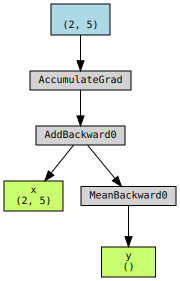

In [23]:
x = torch.randn(2, 5,requires_grad = True)
print('x -->', x)
print('x.requires_grad -->', x.requires_grad)
print()

x = x + 100    # ???
print('x -->', x)
print('x.requires_grad -->', x.requires_grad)
print()

y = x.mean()

make_dot((x, y), params ={'x':x, 'y':y})

x --> tensor([[ 0.0038, -0.6859, -0.0307,  1.0441, -0.5997],
        [-0.9204, -0.1429, -0.7733,  2.1596, -1.3710]], requires_grad=True)
x.requires_grad --> True

x --> tensor([[100.0038,  99.3141,  99.9693, 101.0441,  99.4003],
        [ 99.0796,  99.8571,  99.2267, 102.1596,  98.6290]],
       grad_fn=<AddBackward0>)
x.requires_grad --> True

x.grad --> None



<ipython-input-24-85afc7ef9b72>:14: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print('x.grad -->', x.grad)   # <-- warning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed


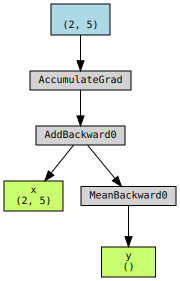

In [24]:
x = torch.randn(2, 5,requires_grad = True)
print('x -->', x)
print('x.requires_grad -->', x.requires_grad)
print()

x = x + 100    # x is assigned to a new tenor, no longer refers to the original tensor
print('x -->', x)
print('x.requires_grad -->', x.requires_grad)
print()

y = x.mean()
y.backward()

print('x.grad -->', x.grad)   # <-- warning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed
print()

make_dot((x, y), params ={'x':x, 'y':y})

## Other in-place operations:

>- tensor.data is an old field and should not be used anymore, so we may avoid using .data to update a tensor value, after tensor operations. for example, if we want x+=100
>- x.add_(100, alpha=1) which is the same as x+=100



x --> tensor([[-1.5142, -0.8463, -1.6154,  0.1304, -1.2269],
        [-0.7454, -0.7768, -0.5808,  1.0800,  0.0920]], requires_grad=True)
x.data --> tensor([[-1.5142, -0.8463, -1.6154,  0.1304, -1.2269],
        [-0.7454, -0.7768, -0.5808,  1.0800,  0.0920]])
x.requires_grad --> True
x.data.requires_grad --> False

x --> tensor([[ 98.4858,  99.1537,  98.3846, 100.1304,  98.7731],
        [ 99.2546,  99.2233,  99.4192, 101.0800, 100.0920]],
       requires_grad=True)
x.data --> tensor([[ 98.4858,  99.1537,  98.3846, 100.1304,  98.7731],
        [ 99.2546,  99.2233,  99.4192, 101.0800, 100.0920]])
x.requires_grad --> True
x.data.requires_grad --> False

x --> tensor([[ 98.4858,  99.1537,  98.3846, 100.1304,  98.7731],
        [ 99.2546,  99.2233,  99.4192, 101.0800, 100.0920]],
       requires_grad=True)
x.data --> tensor([[ 98.4858,  99.1537,  98.3846, 100.1304,  98.7731],
        [ 99.2546,  99.2233,  99.4192, 101.0800, 100.0920]])
x.requires_grad --> True
x.data.requires_grad --> False

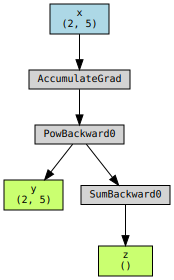

In [26]:
x = torch.randn(2, 5,requires_grad = True)
print('x -->', x)
print('x.data -->', x.data)
print('x.requires_grad -->', x.requires_grad)
print('x.data.requires_grad -->', x.data.requires_grad)
print()

y = x**2
z = y.sum()

x.data = x.data + 100    # <-- Warning:call .data update
print('x -->', x)
print('x.data -->', x.data)
print('x.requires_grad -->', x.requires_grad)
print('x.data.requires_grad -->', x.data.requires_grad)
print()

z.backward()
print('x -->', x)
print('x.data -->', x.data)
print('x.requires_grad -->', x.requires_grad)
print('x.data.requires_grad -->', x.data.requires_grad)
print('x.grad -->', x.grad)
print()

make_dot((x, y, z), params ={'x':x, 'y':y, 'z':z})

In [27]:
x = torch.randn(2, 5,requires_grad = True)
print('x -->', x)
print('x.data -->', x.data)
print('x.requires_grad -->', x.requires_grad)
print('x.data.requires_grad -->', x.data.requires_grad)
print()

y = x**2
z = y.sum()

x.add_(100, alpha=1)
print('x -->', x)
print('x.data -->', x.data)
print('x.requires_grad -->', x.requires_grad)
print('x.data.requires_grad -->', x.data.requires_grad)
print()

z.backward()
print('x -->', x)
print('x.data -->', x.data)
print('x.requires_grad -->', x.requires_grad)
print('x.data.requires_grad -->', x.data.requires_grad)
print('x.grad -->', x.grad)
print()

make_dot((x, y, z), params ={'x':x, 'y':y, 'z':z})

x --> tensor([[-1.8999,  0.0794,  0.9326,  1.2152,  0.6914],
        [-0.3835, -0.1356, -0.0570, -1.3688,  0.7710]], requires_grad=True)
x.data --> tensor([[-1.8999,  0.0794,  0.9326,  1.2152,  0.6914],
        [-0.3835, -0.1356, -0.0570, -1.3688,  0.7710]])
x.requires_grad --> True
x.data.requires_grad --> False



RuntimeError: ignored

# Use "with torch.no_grad()":
In this mode, the computation result will have requires_grad=False, even when the inputs have requires_grad=True.

There is an exception! All factory functions, or functions that create a new Tensor and take a requires_grad kwarg, will NOT be affected by this mode. Details can be found at
https://pytorch.org/docs/stable/generated/torch.no_grad.html

x.requires_grad --> True

z.requires_grad --> True

y.requires_grad --> False



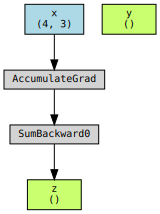

In [28]:
x = torch.randn(4,3,requires_grad = True)
print('x.requires_grad -->', x.requires_grad)
print()

z = x.sum()
print('z.requires_grad -->', z.requires_grad)
print()

with torch.no_grad():
    y = x.sum()

print('y.requires_grad -->', y.requires_grad)
print()

make_dot((x, y, z), params ={'x':x, 'y':y, 'z':z})

x --> tensor([[ 0.3997,  1.0134,  0.5473, -1.2894, -2.6340],
        [-1.9565, -0.9643, -0.0940, -1.8548,  0.5487]], requires_grad=True)
x.requires_grad --> True

x --> tensor([[100.3997, 101.0134, 100.5473,  98.7106,  97.3660],
        [ 98.0435,  99.0357,  99.9060,  98.1452, 100.5487]],
       requires_grad=True)
x.requires_grad --> True

x --> tensor([[100.3997, 101.0134, 100.5473,  98.7106,  97.3660],
        [ 98.0435,  99.0357,  99.9060,  98.1452, 100.5487]],
       requires_grad=True)
x.requires_grad --> True
x.grad --> tensor([[200.7993, 202.0269, 201.0947, 197.4212, 194.7320],
        [196.0870, 198.0715, 199.8120, 196.2904, 201.0974]])



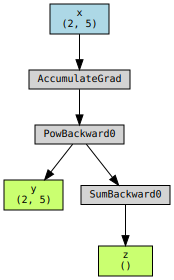

In [29]:
x = torch.randn(2, 5,requires_grad = True)
print('x -->', x)
print('x.requires_grad -->', x.requires_grad)
print()

# In this mode, the computation result will have requires_grad=False, even when the inputs have requires_grad=True.
with torch.no_grad():
    x += 100    # note: it is ok now, but still try to avoid this operation

print('x -->', x)
print('x.requires_grad -->', x.requires_grad)
print()

y = x**2
z = y.sum()

z.backward()
print('x -->', x)
print('x.requires_grad -->', x.requires_grad)
print('x.grad -->', x.grad)
print()

make_dot((x, y, z), params ={'x':x, 'y':y, 'z':z})

## Why does the following have an issue?

In [34]:
x = torch.randn(2, 5,requires_grad = True)
print('x -->', x)
print('x.requires_grad -->', x.requires_grad)
print()

# In this mode, the computation result will have requires_grad=False, even when the inputs have requires_grad=True.
with torch.no_grad():
    x = x + 100

y = x**2
z = y.sum()

z.backward()
print()

x --> tensor([[-0.9852, -0.4629,  0.4437,  1.0275,  0.4342],
        [ 0.7093,  0.0919,  0.3667,  0.8205, -0.3840]], requires_grad=True)
x.requires_grad --> True



RuntimeError: ignored

In [36]:
x = torch.randn(2, 5,requires_grad = True)
print('x -->', x)
print('x.requires_grad -->', x.requires_grad)
print()

# In this mode, the computation result will have requires_grad=False, even when the inputs have requires_grad=True.
with torch.no_grad():
    x = x * 100

print('x -->', x)
print('x.requires_grad -->', x.requires_grad)
print('y.requires_grad -->', y.requires_grad)
print('z.requires_grad -->', z.requires_grad)
print()

y = x**2
z = y.sum()

z.backward()

make_dot((x, y, z), params ={'x':x, 'y':y, 'z':z})

x --> tensor([[ 0.2686, -0.4927,  0.9423, -0.2711, -0.5359],
        [-0.2761, -0.6687, -2.0548,  1.5124,  1.2112]], requires_grad=True)
x.requires_grad --> True

x --> tensor([[  26.8596,  -49.2747,   94.2349,  -27.1054,  -53.5861],
        [ -27.6054,  -66.8703, -205.4835,  151.2447,  121.1217]])
x.requires_grad --> False
y.requires_grad --> False
z.requires_grad --> False



RuntimeError: ignored

## Recall tensor.clone() and tensor.detach()

x --> tensor([[ 0.1856, -0.1550,  1.1654,  0.2940,  0.6300],
        [ 0.6433, -1.5214,  0.8284,  0.8211, -0.1553]], requires_grad=True)
x.data --> tensor([[ 0.1856, -0.1550,  1.1654,  0.2940,  0.6300],
        [ 0.6433, -1.5214,  0.8284,  0.8211, -0.1553]])
x.requires_grad --> True
x.data.requires_grad --> False

x.requires_grad--> True
r.requires_grad--> False
s.requires_grad--> True
t.requires_grad--> False
address of storage instance for tensor x: 95147125717120
address of storage instance for tensor r: 95147125676160
address of storage instance for tensor s: 95147127000512
address of storage instance for tensor t: 95147125717120

x.grad --> tensor([[ 0.3712, -0.3099,  2.3308,  0.5879,  1.2600],
        [ 1.2866, -3.0428,  1.6568,  1.6423, -0.3106]])
r.grad --> None



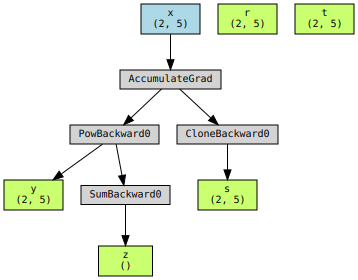

In [37]:
x = torch.randn(2, 5,requires_grad = True)
print('x -->', x)
print('x.data -->', x.data)
print('x.requires_grad -->', x.requires_grad)
print('x.data.requires_grad -->', x.data.requires_grad)
print()

y = x**2
z = y.sum()

with torch.no_grad():
    r = x*1
s = x.clone()
t = x.detach()

z.backward()


print('x.requires_grad-->', x.requires_grad)
print('r.requires_grad-->', r.requires_grad)
print('s.requires_grad-->', s.requires_grad)
print('t.requires_grad-->', t.requires_grad)
print('address of storage instance for tensor x:', x.untyped_storage().data_ptr())
print('address of storage instance for tensor r:', r.untyped_storage().data_ptr())
print('address of storage instance for tensor s:', s.untyped_storage().data_ptr())
print('address of storage instance for tensor t:', t.untyped_storage().data_ptr())
print()

print('x.grad -->', x.grad)
print('r.grad -->', r.grad)
print()

make_dot((x, y, z, r, s, t), params ={'x':x, 'y':y, 'z':z,'r':r , 's':s, 't':t})


x --> tensor([[ 0.9558, -0.8657, -1.9200,  0.7622, -1.4976],
        [-0.9739, -1.2316, -0.6902,  0.0696, -2.8346]], requires_grad=True)
x.data --> tensor([[ 0.9558, -0.8657, -1.9200,  0.7622, -1.4976],
        [-0.9739, -1.2316, -0.6902,  0.0696, -2.8346]])
x.requires_grad --> True
x.data.requires_grad --> False

x.requires_grad--> True
r.requires_grad--> True
s.requires_grad--> True
t.requires_grad--> False
address of storage instance for tensor x: 95147127160768
address of storage instance for tensor r: 95147127160768
address of storage instance for tensor s: 95147127148992
address of storage instance for tensor t: 95147127160768

x.grad --> tensor([[ 1.9116, -1.7315, -3.8400,  1.5244, -2.9952],
        [-1.9479, -2.4631, -1.3804,  0.1392, -5.6691]])
r.grad --> tensor([[ 1.9116, -1.7315, -3.8400,  1.5244, -2.9952],
        [-1.9479, -2.4631, -1.3804,  0.1392, -5.6691]])



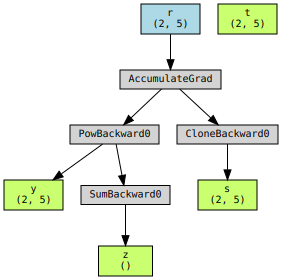

In [38]:
x = torch.randn(2, 5,requires_grad = True)
print('x -->', x)
print('x.data -->', x.data)
print('x.requires_grad -->', x.requires_grad)
print('x.data.requires_grad -->', x.data.requires_grad)
print()

y = x**2
z = y.sum()

with torch.no_grad():
    r = x   # only change
s = x.clone()
t = x.detach()

z.backward()


print('x.requires_grad-->', x.requires_grad)
print('r.requires_grad-->', r.requires_grad)
print('s.requires_grad-->', s.requires_grad)
print('t.requires_grad-->', t.requires_grad)
print('address of storage instance for tensor x:', x.untyped_storage().data_ptr())
print('address of storage instance for tensor r:', r.untyped_storage().data_ptr())
print('address of storage instance for tensor s:', s.untyped_storage().data_ptr())
print('address of storage instance for tensor t:', t.untyped_storage().data_ptr())
print()

print('x.grad -->', x.grad)
print('r.grad -->', r.grad)
print()

make_dot((x, y, z, r, s, t), params ={'x':x, 'y':y, 'z':z,'r':r , 's':s, 't':t})


# Jacobin matrix in .backward

https://pytorch.org/docs/stable/generated/torch.autograd.backward.html
The graph is differentiated using the chain rule. If any of tensors are non-scalar (i.e. their data has more than one element) and require gradient, then the Jacobian-vector product would be computed, in this case the function additionally requires specifying grad_tensors. It should be a sequence of matching length, that contains the “vector” in the Jacobian-vector product, usually the gradient of the differentiated function w.r.t. corresponding tensors (None is an acceptable value for all tensors that don’t need gradient tensors).

In [ ]:
x = torch.randn(3,requires_grad = True)
print('x-->', x)
print()

y = x**2
print('y-->', y)
print()

v = torch.rand(3)
y.backward(v)
print('x.grad -->', x.grad)

In [ ]:
x = torch.randn(3,requires_grad = True)
print('x-->', x)
print()

y = x**2
print('y-->', y)
print()

y.backward()